In [33]:
%reset -f
# Importing libraries
import pandas as pd

In [34]:
# 전처리 불량량 Loading
Defect_df = pd.read_excel('pre_defect_316LDSB.xlsx')
# 전처리 투입량 Loading
Input_df = pd.read_excel('pre_input_316LDSB.xlsx')

In [35]:
Input_df.head()

,압연년,압연월,년월,HEAT_NO,LOT_NO,공정코드,구분,공장명,주조구분,재료코드,...,STRAND_SEQ,주조완료일,주여구분,지시GR종류,생산GR종류,생산GR공정,제강검사완료일,작업일,강관소재여부,주설비구분
0,2023,8,202308,S54522,B360555301,9Y01,압연,산세,T,7730.0,...,NaN,2023-06-01,1,A,A,8301,2023-06-01,2023-08-31,N,C
1,2023,8,202308,S54522,B360555300,9Y01,압연,산세,T,7730.0,...,NaN,2023-06-01,1,A,A,8301,2023-06-01,2023-08-31,N,C
2,2023,8,202308,S54522,B360555204,9Y01,압연,산세,T,7730.0,...,NaN,2023-06-01,1,A,A,8301,2023-06-01,2023-08-31,N,C
3,2023,8,202308,S54522,B360555203,9Y01,압연,산세,T,7730.0,...,NaN,2023-06-01,1,A,A,8301,2023-06-01,2023-08-31,N,C
4,2023,8,202308,S54522,B360555202,9Y01,압연,산세,T,7730.0,...,NaN,2023-06-01,1,A,A,8301,2023-06-01,2023-08-31,N,C


In [36]:
# Convert string column to year-month format
def convert_to_year_month(value):
    if isinstance(value, int):
        year = str(value)[:4]
        month = str(value)[4:]
        return f'{year}-{month.zfill(2)}'
    elif isinstance(value, str):
        year = value[:4]
        month = value[4:]
        return f'{year}-{month.zfill(2)}'
    else:
        return value

Input_df['년월'] = Input_df['년월'].apply(convert_to_year_month)

def convert_to_Rolling_year_month_date(date):
    year = date.year
    month = date.month
    return f'{year}-{month:02}' 


Input_df['압연년월'] = Input_df['최종압연일자'].apply(convert_to_Rolling_year_month_date)

# 압연년월을 datetime으로 변환 후 연도-월만 추출
Input_df['압연년월'] = pd.to_datetime(Input_df['압연년월']).dt.strftime('%Y-%m')

# 압연년월+heat_no
Input_df['압연년월_Heat'] = Input_df['압연년월']+'_'+Input_df['HEAT_NO'].astype(str)

Input_df.head()

,압연년,압연월,년월,HEAT_NO,LOT_NO,공정코드,구분,공장명,주조구분,재료코드,...,주여구분,지시GR종류,생산GR종류,생산GR공정,제강검사완료일,작업일,강관소재여부,주설비구분,압연년월,압연년월_Heat
0,2023,8,2023-08,S54522,B360555301,9Y01,압연,산세,T,7730.0,...,1,A,A,8301,2023-06-01,2023-08-31,N,C,2023-08,2023-08_S54522
1,2023,8,2023-08,S54522,B360555300,9Y01,압연,산세,T,7730.0,...,1,A,A,8301,2023-06-01,2023-08-31,N,C,2023-08,2023-08_S54522
2,2023,8,2023-08,S54522,B360555204,9Y01,압연,산세,T,7730.0,...,1,A,A,8301,2023-06-01,2023-08-31,N,C,2023-08,2023-08_S54522
3,2023,8,2023-08,S54522,B360555203,9Y01,압연,산세,T,7730.0,...,1,A,A,8301,2023-06-01,2023-08-31,N,C,2023-08,2023-08_S54522
4,2023,8,2023-08,S54522,B360555202,9Y01,압연,산세,T,7730.0,...,1,A,A,8301,2023-06-01,2023-08-31,N,C,2023-08,2023-08_S54522


In [37]:
Defect_df.head()

,압연년,압연월,년월일,업무구분,공장구분,HEAT_NO,LOT_NO,PON,공정순위,주조구분,...,압연일자4,압연외경4,압연폭4,최종압연공정,최종압연일자,제품압연작업조,생성일시,HCR,투입중량,주설비구분
0,2023,9,2023-09-22,2,9,S54805,B360593201,D23W9W1414,80,T,...,NaN,0,0,8100,2023-09-21,B,2023-10-05,NaN,NaN,C
1,2023,9,2023-09-22,2,9,S54805,B360593201,D23W9W1414,80,T,...,NaN,0,0,8100,2023-09-21,B,2023-10-05,NaN,NaN,C
2,2023,7,2023-07-24,2,9,S54204,B350698202,D23W7W1114,90,T,...,NaN,0,0,8100,2023-07-23,B,2023-08-07,NaN,NaN,C
3,2024,4,2024-04-29,2,9,S57283,B440412302,D24W3W1469,80,T,...,NaN,0,0,8100,2024-04-28,C,2024-05-03,NaN,NaN,C
4,2024,4,2024-04-29,2,9,S57283,B440412201,D24W4W1343,80,T,...,NaN,0,0,8100,2024-04-28,C,2024-05-03,NaN,NaN,C


In [38]:
def convert_to_year_month_date(date):
    year, month, _ = date.split('-')
    return f'{year}-{month}'

def convert_to_Rolling_year_month_date(date):
    year = date.year
    month = date.month
    return f'{year}-{month:02}' 

Defect_df['년월'] = Defect_df['년월일'].apply(convert_to_year_month_date)
Defect_df['압연년월'] = Defect_df['최종압연일자'].apply(convert_to_Rolling_year_month_date)

# 압연년월을 datetime으로 변환 후 연도-월만 추출
Defect_df['압연년월'] = pd.to_datetime(Defect_df['압연년월']).dt.strftime('%Y-%m')

# 압연년월+heat_no
Defect_df['압연년월_Heat'] = Defect_df['압연년월']+'_'+Defect_df['HEAT_NO'].astype(str)

# 년월은 년월일 컬럼 앞에 배치
position = Defect_df.columns.get_loc('년월일')
Defect_df.insert(position, '년월', Defect_df.pop('년월'))

Defect_df.head()

,압연년,압연월,년월,년월일,업무구분,공장구분,HEAT_NO,LOT_NO,PON,공정순위,...,압연폭4,최종압연공정,최종압연일자,제품압연작업조,생성일시,HCR,투입중량,주설비구분,압연년월,압연년월_Heat
0,2023,9,2023-09,2023-09-22,2,9,S54805,B360593201,D23W9W1414,80,...,0,8100,2023-09-21,B,2023-10-05,NaN,NaN,C,2023-09,2023-09_S54805
1,2023,9,2023-09,2023-09-22,2,9,S54805,B360593201,D23W9W1414,80,...,0,8100,2023-09-21,B,2023-10-05,NaN,NaN,C,2023-09,2023-09_S54805
2,2023,7,2023-07,2023-07-24,2,9,S54204,B350698202,D23W7W1114,90,...,0,8100,2023-07-23,B,2023-08-07,NaN,NaN,C,2023-07,2023-07_S54204
3,2024,4,2024-04,2024-04-29,2,9,S57283,B440412302,D24W3W1469,80,...,0,8100,2024-04-28,C,2024-05-03,NaN,NaN,C,2024-04,2024-04_S57283
4,2024,4,2024-04,2024-04-29,2,9,S57283,B440412201,D24W4W1343,80,...,0,8100,2024-04-28,C,2024-05-03,NaN,NaN,C,2024-04,2024-04_S57283


In [39]:
# 기간 설정
start_date = pd.to_datetime('2023-01')  # None for no filter,or # '2023-01'
end_date = pd.to_datetime('2024-09')    # None for no filter,or # '2023-08'

# 기간 설정의 범위 결정()
if start_date is None or end_date is None:
    min_date = min(Input_df['압연년월'].min(), Defect_df['압연년월'].min())
    max_date = max(Input_df['압연년월'].max(), Defect_df['압연년월'].max())
    if start_date is None:
        start_date = min_date
    if end_date is None:
        end_date = max_date

# Convert the 'Year Month' column in Input_df and Defect_df to datetime if it's not already
Input_df['압연년월'] = pd.to_datetime(Input_df['압연년월'])
Defect_df['압연년월'] = pd.to_datetime(Defect_df['압연년월'])
#Scrap_df['압연년월'] = pd.to_datetime(Scrap_df['압연년월'])

# 기간 필터 적용
Input_df = Input_df[(Input_df['압연년월'] >= start_date) & (Input_df['압연년월'] <= end_date)]
Defect_df = Defect_df[(Defect_df['압연년월'] >= start_date) & (Defect_df['압연년월'] <= end_date)]
#Scrap_df = Scrap_df[(Scrap_df['압연년월'] >= start_date) & (Scrap_df['압연년월'] <= end_date)]


# 여러 개의 필터 조건 설정
steel_grade_filters = ['316LDSB'] #'316LDS1','316LDSB','STS304HCS5','STS304SX'
out_dia_filters =[]
defects_filters =['SEAM','SEAM+터짐', 'SEAM+종크랙','터짐','종크랙','SCAB','줄파임'] #'SEAM','SEAM+터짐', 'SEAM+종크랙','터짐','종크랙'


# 필터링 조건 생성(1)- apply_filters
def apply_filters(dataframe):
    if steel_grade_filters:
        grade_condition = dataframe['사내강종명'].isin(steel_grade_filters)
    else:
        grade_condition = pd.Series(True, index=dataframe.index)  # 모든 행에 대해 True로 설정

    if out_dia_filters:
        dia_condition = dataframe['외경'].isin(out_dia_filters)
    else:
        dia_condition = pd.Series(True, index=dataframe.index)  # 모든 행에 대해 True로 설정
    
    return grade_condition & dia_condition 

# 필터링 조건 생성(2) - apply_filters_2
def apply_filters_2(dataframe):
    if steel_grade_filters:
        grade_condition = dataframe['사내강종명'].isin(steel_grade_filters)
    else:
        grade_condition = pd.Series(True, index=dataframe.index)  # 모든 행에 대해 True로 설정

    if out_dia_filters:
        dia_condition = dataframe['외경'].isin(out_dia_filters)
    else:
        dia_condition = pd.Series(True, index=dataframe.index)  # 모든 행에 대해 True로 설정

    if defects_filters:
        defects_condition = dataframe['이상코드명'].isin(defects_filters)
    else:
        defects_condition = pd.Series(True, index=dataframe.index)  # 모든 행에 대해 True로 설정
    
    return grade_condition & dia_condition & defects_condition

# 필터링된 결과 출력(덮어쓰기 했음!)
Input_df = Input_df[apply_filters(Input_df)]
Defect_df = Defect_df[apply_filters_2(Defect_df)]
#Scrap_df = Scrap_df[apply_filters_2(Scrap_df)]

#--------------------------------------------------------------------------------------------------------------------
# 1번 HEAT별 merged_df
# Group by year and month, sum the '투입중량' and '발생중량'
grouped_input = Input_df.groupby('HEAT_NO')['투입중량'].sum().reset_index()
grouped_defect = Defect_df.groupby('HEAT_NO')['발생중량'].sum().reset_index()
#grouped_scrap = Scrap_df.groupby('HEAT_NO')['폐기중량'].sum().reset_index()

# Merge input and defect data on 'Roll_Yr_Mth'
merged_df = pd.merge(grouped_input, grouped_defect, on='HEAT_NO', how='left')
#merged_df = pd.merge(merged_df, grouped_scrap, on='HEAT_NO', how='left')

# Fill missing defect values with 0
merged_df['발생중량'] = merged_df['발생중량'].fillna(0)
#merged_df['폐기중량'] = merged_df['폐기중량'].fillna(0)

# Calculate defect rate
merged_df['불량율'] = (merged_df['발생중량'] / merged_df['투입중량']) * 100
#merged_df['폐기율'] = (merged_df['폐기중량'] / merged_df['투입중량']) * 100

#merged_df.head()
# Create a new column '년-월' with formatted year and month
#merged_df['압연년월'] = merged_df['압연년월'].dt.year.astype(str) + '-' + merged_df['압연년월'].dt.month.astype(str)

# Print the merged DataFrame with defect rate
# print(merged_df)

#--------------------------------------------------------------------------------------------------------------------
# 2번 압연년월 merged_df2
# Group by year and month, sum the '투입중량' and '발생중량'
grouped_input2 = Input_df.groupby('압연년월')['투입중량'].sum().reset_index()
grouped_defect2 = Defect_df.groupby('압연년월')['발생중량'].sum().reset_index()
#grouped_scrap2 = Scrap_df.groupby('압연년월')['폐기중량'].sum().reset_index()

# Merge input and defect data on 'Roll_Yr_Mth'
merged_df2 = pd.merge(grouped_input2, grouped_defect2, on='압연년월', how='left')
#merged_df2 = pd.merge(merged_df2, grouped_scrap2, on='압연년월', how='left')

# Fill missing defect values with 0
merged_df2['발생중량'] = merged_df2['발생중량'].fillna(0)
#merged_df2['폐기중량'] = merged_df2['폐기중량'].fillna(0)

# Calculate defect rate
merged_df2['불량율'] = (merged_df2['발생중량'] / merged_df2['투입중량']) * 100

#--------------------------------------------------------------------------------------------------------------------
# 3번 압연년월_Heat_no merged_df3
# Group by year and month, sum the '투입중량' and '발생중량'
grouped_input3 = Input_df.groupby('압연년월_Heat')['투입중량'].sum().reset_index()
grouped_defect3 = Defect_df.groupby('압연년월_Heat')['발생중량'].sum().reset_index()
#grouped_scrap3 = Scrap_df.groupby('압연년월_Heat')['폐기중량'].sum().reset_index()

# Merge input and defect data on 'Roll_Yr_Mth'
merged_df3 = pd.merge(grouped_input3, grouped_defect3, on='압연년월_Heat', how='left')
#merged_df3 = pd.merge(merged_df3, grouped_scrap3, on='압연년월_Heat', how='left')

# Fill missing defect values with 0
merged_df3['발생중량'] = merged_df3['발생중량'].fillna(0)
#merged_df3['폐기중량'] = merged_df3['폐기중량'].fillna(0)

# Calculate defect rate
merged_df3['불량율'] = (merged_df3['발생중량'] / merged_df3['투입중량']) * 100

In [40]:
merged_df

,HEAT_NO,투입중량,발생중량,불량율
0,S53162,34125,0.0,0.000000
1,S53872,97500,155.0,0.158974
2,S53873,107250,0.0,0.000000
3,S53874,107250,4892.0,4.561305
4,S53875,106849,9538.0,8.926616
...,...,...,...,...
79,S58625,94256,15834.0,16.798931
80,S58895,24420,7265.0,29.750205
81,S58896,84537,32301.0,38.209305
82,S58897,92607,23799.0,25.698921


In [41]:
#투입중량, 발생중량을 톤으로 변경
merged_df['투입중량'] = merged_df['투입중량'] / 1000
merged_df['발생중량'] = merged_df['발생중량'] / 1000
#merged_df['폐기중량'] = merged_df['폐기중량'] / 1000

merged_df

,HEAT_NO,투입중량,발생중량,불량율
0,S53162,34.125,0.000,0.000000
1,S53872,97.500,0.155,0.158974
2,S53873,107.250,0.000,0.000000
3,S53874,107.250,4.892,4.561305
4,S53875,106.849,9.538,8.926616
...,...,...,...,...
79,S58625,94.256,15.834,16.798931
80,S58895,24.420,7.265,29.750205
81,S58896,84.537,32.301,38.209305
82,S58897,92.607,23.799,25.698921


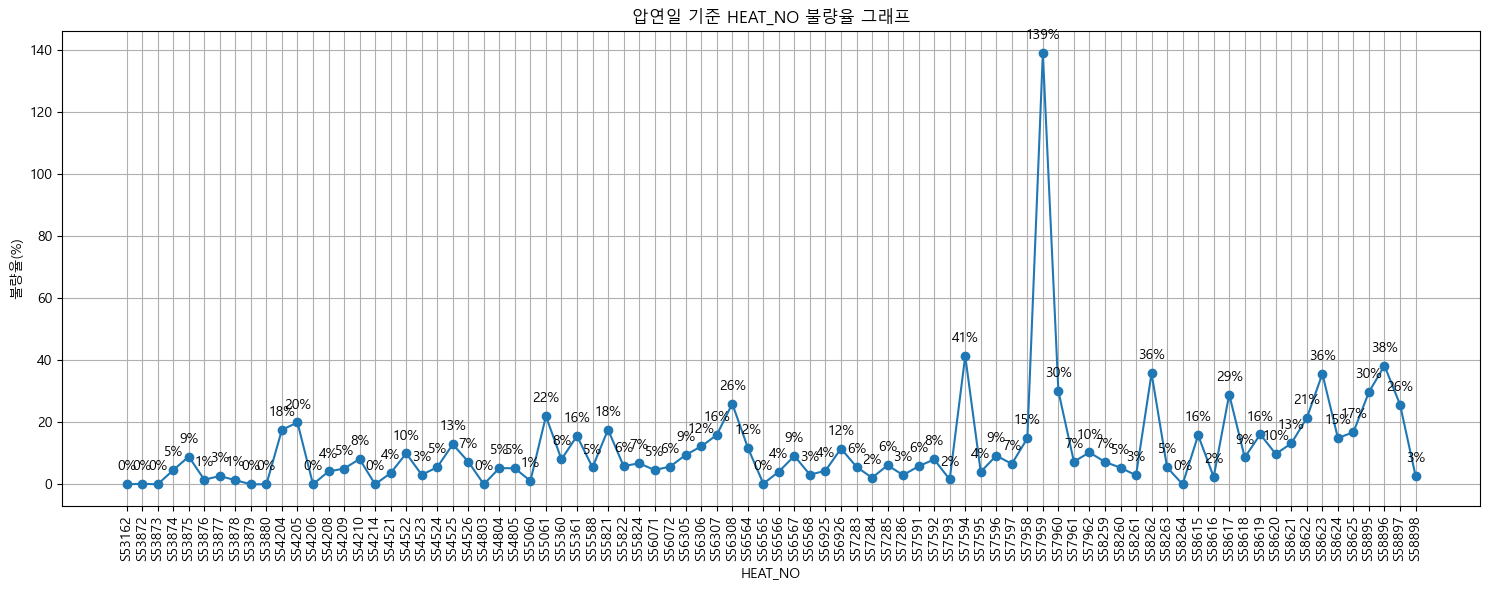

In [42]:
#불량율 그래프(1)
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# Set font for Korean characters
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 한글 폰트 파일 경로를 입력해주세요
font_name = font_manager.FontProperties(fname=font_path).get_name() # 폰트 이름 얻어오기
rc('font', family=font_name) # 그래프에 한글 폰트 적용하기

# Plot the defect rate line chart
plt.figure(figsize=(15, 6))
plt.plot(merged_df['HEAT_NO'], merged_df['불량율'], marker='o')
plt.xlabel('HEAT_NO')
plt.ylabel('불량율(%)')
plt.title('압연일 기준 HEAT_NO 불량율 그래프')
plt.xticks(rotation=90)
plt.grid(True)

# Annotate each point with the defect rate
for i, row in merged_df.iterrows():
    plt.annotate(f'{row["불량율"]:.0f}%', (row['HEAT_NO'], row['불량율']),
                 textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()

# Show the plot
plt.show()

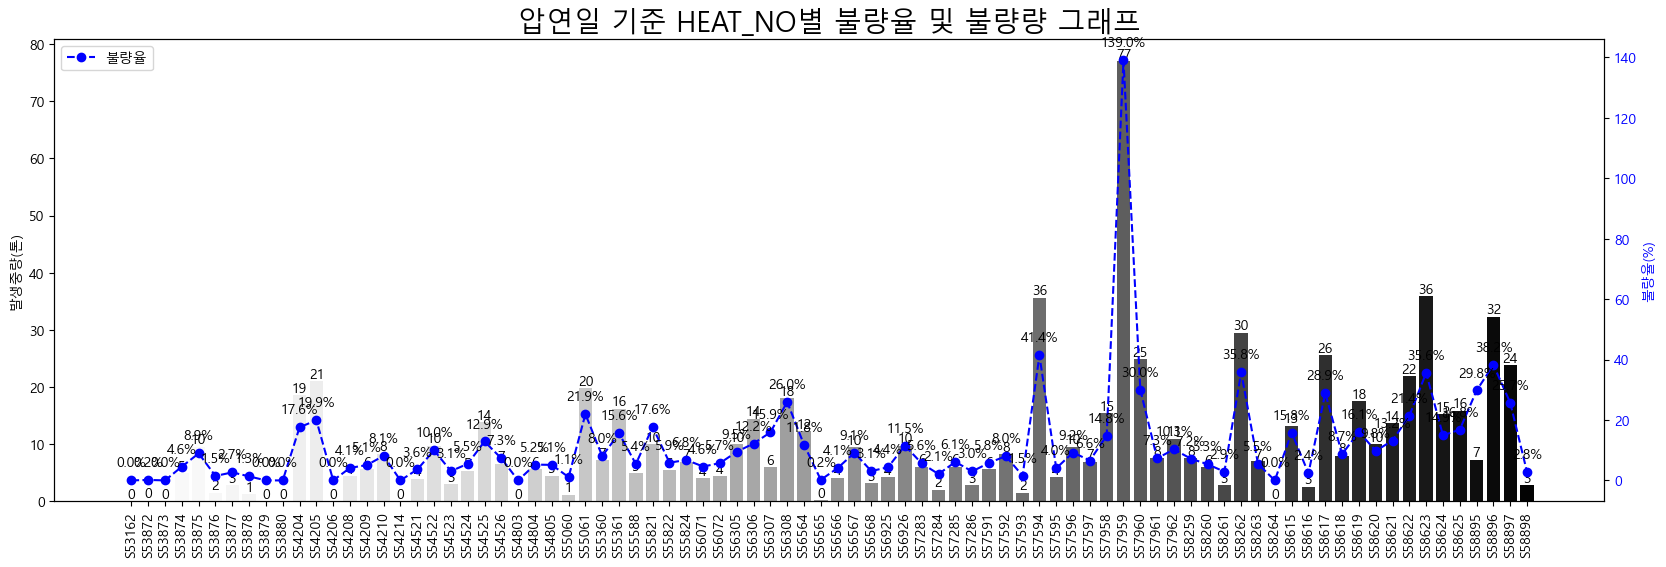

In [53]:
#불량율 그래프(2)
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns

# Set font for Korean characters
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 한글 폰트 파일 경로를 입력해주세요
font_name = font_manager.FontProperties(fname=font_path).get_name() # 폰트 이름 얻어오기
rc('font', family=font_name) # 그래프에 한글 폰트 적용하기

# 1. 데이터 준비
x = merged_df['HEAT_NO']
y1 = merged_df['불량율']
y2 = merged_df['발생중량']


# 2. 기본 스타일 및 그래프 그리기
fig = plt.figure(figsize=(20,6)) ## Figure 생성 
fig.set_facecolor('white') ## Figure 배경색 지정
ax1 = fig.add_subplot() ## axes 생성
 
colors = sns.color_palette('Greys', len(x)) ## 바 차트 색상
 
xtick_label_position = list(range(len(x))) ## x축 눈금 라벨이 표시될 x좌표
ax1.set_xticks(xtick_label_position) ## x축 눈금 
ax1.set_xticklabels(x, rotation=90) ## x축 눈금 라벨
ax1.bar(xtick_label_position, y2, color=colors) ## 바차트 출력
ax1.set_ylabel('발생중량(톤)')  # ax1에 y축 라벨 추가
 
color = 'blue'
ax2 = ax1.twinx() ## 새로운 axis 생성
ax2.plot(xtick_label_position, y1, color=color, linestyle='--', marker='o', label ='불량율') ## 선 그래프 
ax2.tick_params(axis='y', labelcolor=color) ## 눈금 라벨 색상 지정
ax2.set_ylabel('불량율(%)', color=color)

# Combine legends for both axes
lines, labels = ax2.get_legend_handles_labels()
bars = ax1.patches
plots = lines + [bars[0]]  # Adding the first bar patch to the legend for clarity
ax1.legend(plots, labels, loc='upper left')

# 불량중량 값을 바 위에 표시
for i, val in enumerate(y2):
    ax1.annotate(f'{val:.0f}', (xtick_label_position[i], val), textcoords="offset points", xytext=(0, 5), ha='center', va='center')

# 불량율 값을 선 위에 표시
for i, val in enumerate(y1):
    ax2.annotate(f'{val:.1f}%', (xtick_label_position[i], val), textcoords="offset points", xytext=(0, 10), ha='center')
 
plt.title('압연일 기준 HEAT_NO별 불량율 및 불량량 그래프', fontsize=20)
plt.show()

In [44]:
merged_df2

,압연년월,투입중량,발생중량,불량율
0,2023-04-01,708108,20070,2.834313
1,2023-05-01,426224,15699,3.683275
2,2023-06-01,271197,16469,6.072707
3,2023-07-01,419250,48956,11.677042
4,2023-08-01,297375,16923,5.690794
5,2023-09-01,254171,23268,9.154467
6,2023-10-01,208000,9836,4.728846
7,2023-11-01,267835,23617,8.817742
8,2023-12-01,172250,8335,4.838897
9,2024-01-01,344945,53692,15.565380


In [45]:
# 압연년월을 datetime으로 변환 후 연도-월만 추출
merged_df2['압연년월'] = pd.to_datetime(merged_df2['압연년월']).dt.strftime('%Y-%m')
merged_df2

,압연년월,투입중량,발생중량,불량율
0,2023-04,708108,20070,2.834313
1,2023-05,426224,15699,3.683275
2,2023-06,271197,16469,6.072707
3,2023-07,419250,48956,11.677042
4,2023-08,297375,16923,5.690794
5,2023-09,254171,23268,9.154467
6,2023-10,208000,9836,4.728846
7,2023-11,267835,23617,8.817742
8,2023-12,172250,8335,4.838897
9,2024-01,344945,53692,15.565380


In [46]:
#투입중량, 발생중량을 톤으로 변경
merged_df2['투입중량'] = merged_df2['투입중량'] / 1000
merged_df2['발생중량'] = merged_df2['발생중량'] / 1000
#merged_df2['폐기중량'] = merged_df2['폐기중량'] / 1000

merged_df2

,압연년월,투입중량,발생중량,불량율
0,2023-04,708.108,20.070,2.834313
1,2023-05,426.224,15.699,3.683275
2,2023-06,271.197,16.469,6.072707
3,2023-07,419.250,48.956,11.677042
4,2023-08,297.375,16.923,5.690794
5,2023-09,254.171,23.268,9.154467
6,2023-10,208.000,9.836,4.728846
7,2023-11,267.835,23.617,8.817742
8,2023-12,172.250,8.335,4.838897
9,2024-01,344.945,53.692,15.565380


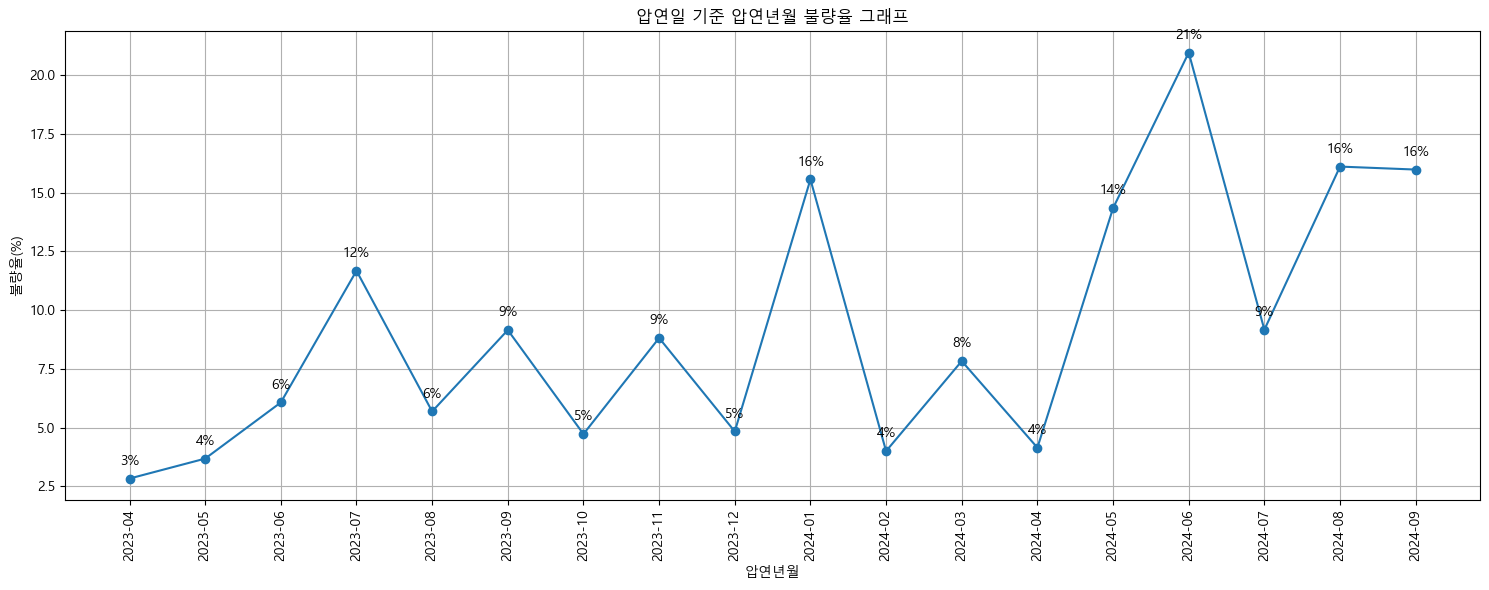

In [47]:
#불량율 그래프(1)
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# Set font for Korean characters
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 한글 폰트 파일 경로를 입력해주세요
font_name = font_manager.FontProperties(fname=font_path).get_name() # 폰트 이름 얻어오기
rc('font', family=font_name) # 그래프에 한글 폰트 적용하기

# Plot the defect rate line chart
plt.figure(figsize=(15, 6))
plt.plot(merged_df2['압연년월'], merged_df2['불량율'], marker='o')
plt.xlabel('압연년월')
plt.ylabel('불량율(%)')
plt.title('압연일 기준 압연년월 불량율 그래프')
plt.xticks(rotation=90)
plt.grid(True)

# Annotate each point with the defect rate
for i, row in merged_df2.iterrows():
    plt.annotate(f'{row["불량율"]:.0f}%', (row['압연년월'], row['불량율']),
                 textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()

# Show the plot
plt.show()

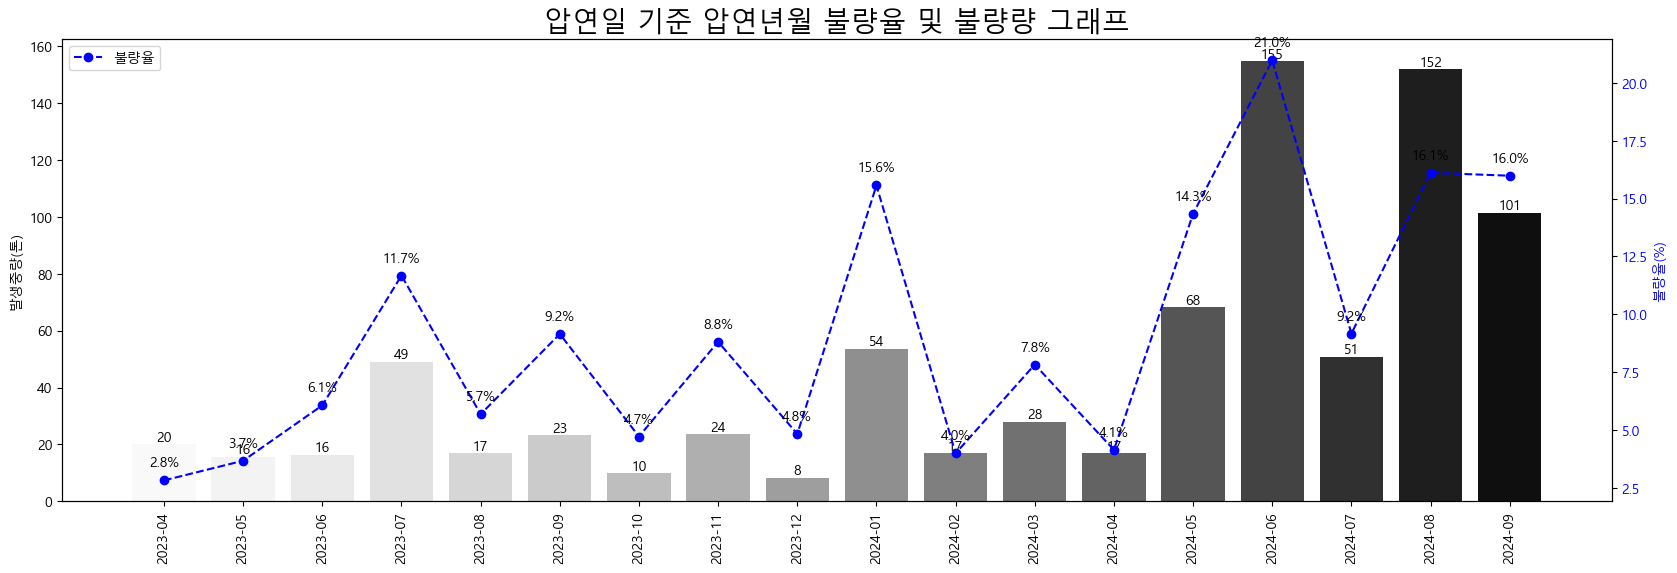

In [48]:
#불량율 그래프(2)
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns

# Set font for Korean characters
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 한글 폰트 파일 경로를 입력해주세요
font_name = font_manager.FontProperties(fname=font_path).get_name() # 폰트 이름 얻어오기
rc('font', family=font_name) # 그래프에 한글 폰트 적용하기

# 1. 데이터 준비
x = merged_df2['압연년월']
y1 = merged_df2['불량율']
y2 = merged_df2['발생중량']


# 2. 기본 스타일 및 그래프 그리기
fig = plt.figure(figsize=(20,6)) ## Figure 생성 
fig.set_facecolor('white') ## Figure 배경색 지정
ax1 = fig.add_subplot() ## axes 생성
 
colors = sns.color_palette('Greys', len(x)) ## 바 차트 색상
 
xtick_label_position = list(range(len(x))) ## x축 눈금 라벨이 표시될 x좌표
ax1.set_xticks(xtick_label_position) ## x축 눈금 
ax1.set_xticklabels(x, rotation=90) ## x축 눈금 라벨
ax1.bar(xtick_label_position, y2, color=colors) ## 바차트 출력
ax1.set_ylabel('발생중량(톤)')  # ax1에 y축 라벨 추가
 
color = 'blue'
ax2 = ax1.twinx() ## 새로운 axis 생성
ax2.plot(xtick_label_position, y1, color=color, linestyle='--', marker='o', label ='불량율') ## 선 그래프 
ax2.tick_params(axis='y', labelcolor=color) ## 눈금 라벨 색상 지정
ax2.set_ylabel('불량율(%)', color=color)

# Combine legends for both axes
lines, labels = ax2.get_legend_handles_labels()
bars = ax1.patches
plots = lines + [bars[0]]  # Adding the first bar patch to the legend for clarity
ax1.legend(plots, labels, loc='upper left')

# 불량중량 값을 바 위에 표시
for i, val in enumerate(y2):
    ax1.annotate(f'{val:.0f}', (xtick_label_position[i], val), textcoords="offset points", xytext=(0, 5), ha='center', va='center')

# 불량율 값을 선 위에 표시
for i, val in enumerate(y1):
    ax2.annotate(f'{val:.1f}%', (xtick_label_position[i], val), textcoords="offset points", xytext=(0, 10), ha='center')
 
plt.title('압연일 기준 압연년월 불량율 및 불량량 그래프', fontsize=20)
plt.show()

In [49]:
merged_df3

,압연년월_Heat,투입중량,발생중량,불량율
0,2023-04_S53162,34125,0.0,0.000000
1,2023-04_S53874,55250,4892.0,8.854299
2,2023-04_S53875,106849,9538.0,8.926616
3,2023-04_S53876,105625,1557.0,1.474083
4,2023-04_S53877,105625,2810.0,2.660355
...,...,...,...,...
121,2024-09_S58618,92618,8018.0,8.657065
122,2024-09_S58895,24420,7265.0,29.750205
123,2024-09_S58896,84537,32301.0,38.209305
124,2024-09_S58897,92607,23799.0,25.698921


In [50]:
#투입중량, 발생중량을 톤으로 변경
merged_df3['투입중량'] = merged_df3['투입중량'] / 1000
merged_df3['발생중량'] = merged_df3['발생중량'] / 1000
#merged_df3['폐기중량'] = merged_df3['폐기중량'] / 1000

merged_df3

,압연년월_Heat,투입중량,발생중량,불량율
0,2023-04_S53162,34.125,0.000,0.000000
1,2023-04_S53874,55.250,4.892,8.854299
2,2023-04_S53875,106.849,9.538,8.926616
3,2023-04_S53876,105.625,1.557,1.474083
4,2023-04_S53877,105.625,2.810,2.660355
...,...,...,...,...
121,2024-09_S58618,92.618,8.018,8.657065
122,2024-09_S58895,24.420,7.265,29.750205
123,2024-09_S58896,84.537,32.301,38.209305
124,2024-09_S58897,92.607,23.799,25.698921


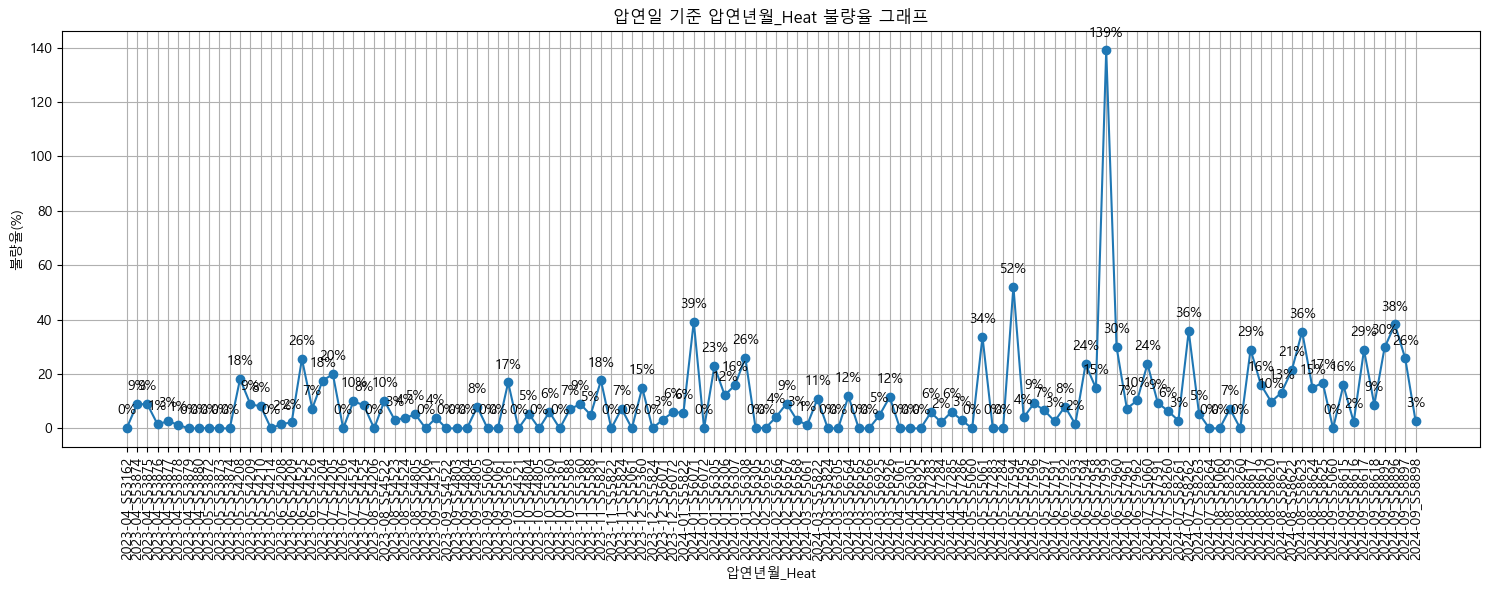

In [51]:
#불량율 그래프(1)
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# Set font for Korean characters
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 한글 폰트 파일 경로를 입력해주세요
font_name = font_manager.FontProperties(fname=font_path).get_name() # 폰트 이름 얻어오기
rc('font', family=font_name) # 그래프에 한글 폰트 적용하기

# Plot the defect rate line chart
plt.figure(figsize=(15, 6))
plt.plot(merged_df3['압연년월_Heat'], merged_df3['불량율'], marker='o')
plt.xlabel('압연년월_Heat')
plt.ylabel('불량율(%)')
plt.title('압연일 기준 압연년월_Heat 불량율 그래프')
plt.xticks(rotation=90)
plt.grid(True)

# Annotate each point with the defect rate
for i, row in merged_df3.iterrows():
    plt.annotate(f'{row["불량율"]:.0f}%', (row['압연년월_Heat'], row['불량율']),
                 textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()

# Show the plot
plt.show()

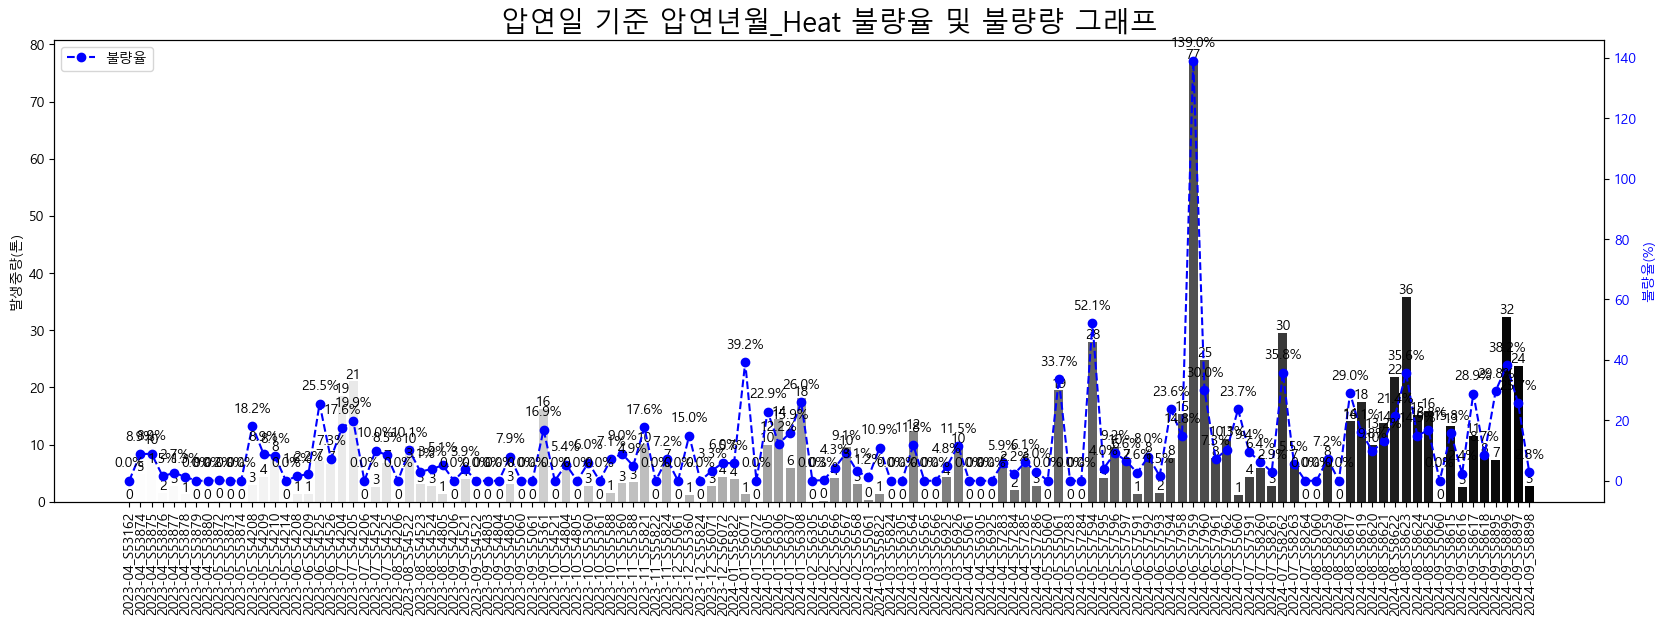

In [52]:
#불량율 그래프(2)
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns

# Set font for Korean characters
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 한글 폰트 파일 경로를 입력해주세요
font_name = font_manager.FontProperties(fname=font_path).get_name() # 폰트 이름 얻어오기
rc('font', family=font_name) # 그래프에 한글 폰트 적용하기

# 1. 데이터 준비
x = merged_df3['압연년월_Heat']
y1 = merged_df3['불량율']
y2 = merged_df3['발생중량']


# 2. 기본 스타일 및 그래프 그리기
fig = plt.figure(figsize=(20,6)) ## Figure 생성 
fig.set_facecolor('white') ## Figure 배경색 지정
ax1 = fig.add_subplot() ## axes 생성
 
colors = sns.color_palette('Greys', len(x)) ## 바 차트 색상
 
xtick_label_position = list(range(len(x))) ## x축 눈금 라벨이 표시될 x좌표
ax1.set_xticks(xtick_label_position) ## x축 눈금 
ax1.set_xticklabels(x, rotation=90) ## x축 눈금 라벨
ax1.bar(xtick_label_position, y2, color=colors) ## 바차트 출력
ax1.set_ylabel('발생중량(톤)')  # ax1에 y축 라벨 추가
 
color = 'blue'
ax2 = ax1.twinx() ## 새로운 axis 생성
ax2.plot(xtick_label_position, y1, color=color, linestyle='--', marker='o', label ='불량율') ## 선 그래프 
ax2.tick_params(axis='y', labelcolor=color) ## 눈금 라벨 색상 지정
ax2.set_ylabel('불량율(%)', color=color)

# Combine legends for both axes
lines, labels = ax2.get_legend_handles_labels()
bars = ax1.patches
plots = lines + [bars[0]]  # Adding the first bar patch to the legend for clarity
ax1.legend(plots, labels, loc='upper left')

# 불량중량 값을 바 위에 표시
for i, val in enumerate(y2):
    ax1.annotate(f'{val:.0f}', (xtick_label_position[i], val), textcoords="offset points", xytext=(0, 5), ha='center', va='center')

# 불량율 값을 선 위에 표시
for i, val in enumerate(y1):
    ax2.annotate(f'{val:.1f}%', (xtick_label_position[i], val), textcoords="offset points", xytext=(0, 10), ha='center')
 
plt.title('압연일 기준 압연년월_Heat 불량율 및 불량량 그래프', fontsize=20)
plt.show()